In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# **Load Voice**
membaca suara file suara .wav

In [12]:
fs, data = wavfile.read('/kaggle/input/wave-voice/07056007.wav')

/tmp/ipykernel_35/3195977990.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read('/kaggle/input/wave-voice/07056007.wav')


In [13]:
if len(data.shape) == 2:
    data = data[:, 0]

# **1. Amplifikasi (Perbesar volume)**
Menambah volume dengan mengalikan nilai amplitudo (biasanya antara -32768 sampai +32767)


In [14]:
amplified = data * 2

# **2. Pergeseran (Shift)**
Menggeser sinyal ke kanan sebanyak 1000 sampel.
Mirip dengan delay atau memajukan/menunda sinyal.

In [15]:
shifted = np.roll(data, 1000)

# **3. Penjumlahan noice**
Menambahkan noise acak dengan distribusi normal (mean = 0, standar deviasi = 500).
Ini mensimulasikan kondisi suara bising, bisa untuk eksperimen filtering atau robust testing.

In [16]:
noise = np.random.normal(0, 500, data.shape)
noisy = data + noise.astype(np.int16)

# **Visualisasi Hasil**

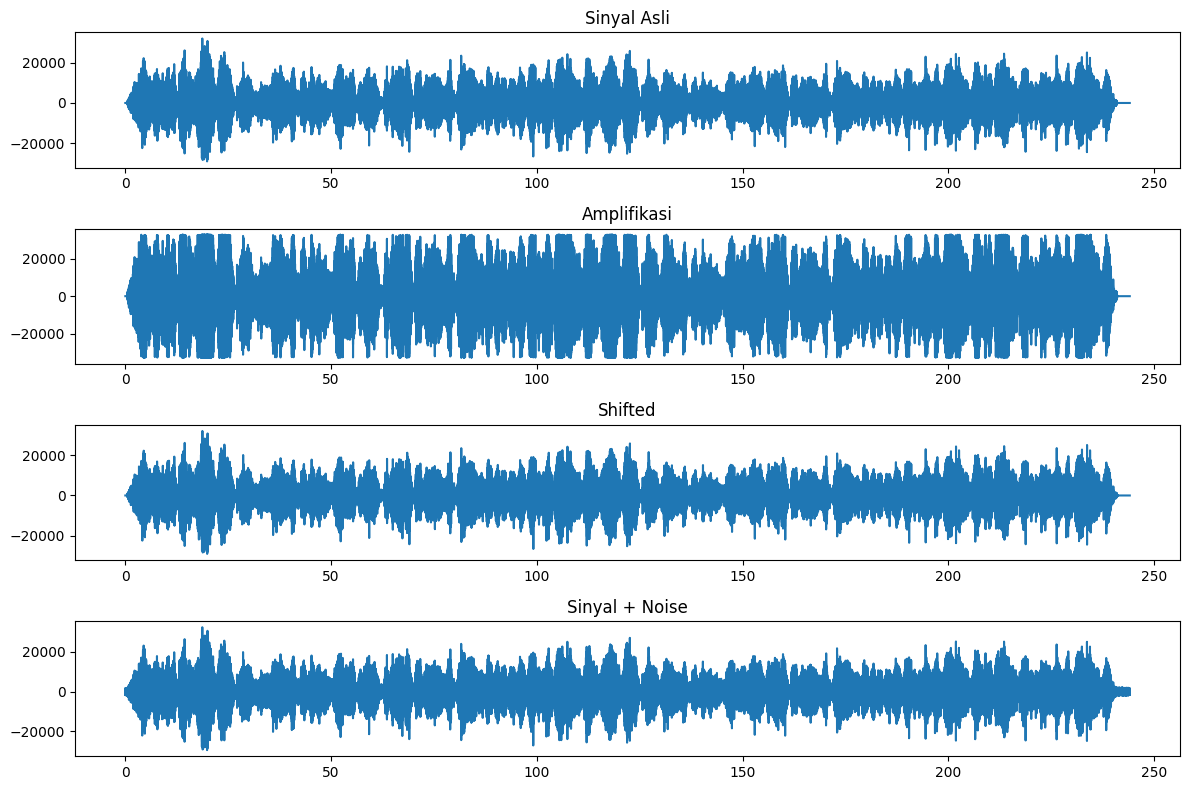

In [17]:
time = np.linspace(0, len(data)/fs, num=len(data))

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(time, data)
plt.title("Sinyal Asli")

plt.subplot(4, 1, 2)
plt.plot(time, amplified)
plt.title("Amplifikasi")

plt.subplot(4, 1, 3)
plt.plot(time, shifted)
plt.title("Shifted")

plt.subplot(4, 1, 4)
plt.plot(time, noisy)
plt.title("Sinyal + Noise")

plt.tight_layout()
plt.show()